# Panel Veri Analizi

Panel veri 3 boyutlu olarak oluşturulan veri setleridir. Python'da pandas kütüphanesi kullanılarak panel veri setleri oluşturulabilir.



## 1. Kütüphanelerin Çağrılması

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Veriyi Çağırma

Bu çalışmada veri bir internet adresi (URL) üzerinden çağrılaracaktır.

In [102]:
url='https://raw.githubusercontent.com/fvgm-spec/csv_files/master/real_minimum_wages.csv'
panel_veri=pd.read_csv(url)
print(type(panel_veri),'\n')
print('Veri boyutu={} \n'.format(panel_veri.shape))
print(panel_veri.columns)

<class 'pandas.core.frame.DataFrame'> 

Veri boyutu=(2244, 17) 

Index(['COUNTRY', 'Country', 'SERIES', 'Series', 'PERIOD', 'Pay period',
       'TIME', 'Time', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')


In [5]:
len(panel_veri['Country'].unique())

32

In [6]:
panel_veri.head(15)
panel_veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COUNTRY                2244 non-null   object 
 1   Country                2244 non-null   object 
 2   SERIES                 2244 non-null   object 
 3   Series                 2244 non-null   object 
 4   PERIOD                 2244 non-null   object 
 5   Pay period             2244 non-null   object 
 6   TIME                   2244 non-null   int64  
 7   Time                   2244 non-null   int64  
 8   Unit Code              2244 non-null   object 
 9   Unit                   2244 non-null   object 
 10  PowerCode Code         2244 non-null   int64  
 11  PowerCode              2244 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  2244 non-null   float64
 15  Flag

In [11]:
count=0
for i in range(len(panel_veri['Time'])):
  if panel_veri['Time'][i] in panel_veri['TIME']:
    count=count+1
    continue
  else:
    print('Farklı veri var')
    break
print('Tespit edilen ortak veri sayısı=',count) 

Tespit edilen ortak veri sayısı= 2244


## 3. Verinin Ön Analizleri

Veri içerisindeki NaN verileri çıkarılarak analiz yapılacaktır.

In [103]:
# panel_veri=panel_veri.drop(["Flag Codes","Flags","Reference Period Code","Reference Period","TIME"],axis=1)
panel_veri=panel_veri.drop(panel_veri.iloc[:,[6,12,13,15,16]],axis=1)
print('Yeni Veri boyutu={} \n'.format(panel_veri.shape))
print(panel_veri.columns)

Yeni Veri boyutu=(2244, 12) 

Index(['COUNTRY', 'Country', 'SERIES', 'Series', 'PERIOD', 'Pay period',
       'Time', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode', 'Value'],
      dtype='object')


## Verinin Pivot İşlemleri

In [15]:
panel_veri['Time'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [104]:
panel_veri=panel_veri.pivot_table(values='Value',
                                  index='Time',
                                  columns=['Country', 'Series', 'Pay period'])

In [ ]:
panel_veri.head(15)

PowerCode Code         \
Country                                   Australia          
Series     In 2018 constant prices at 2018 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2001                                            0.0    0.0   
2002                                            0.0    0.0   
2003                                            0.0    0.0   
2004                                            0.0    0.0   
2005                                            0.0    0.0   
2006                                            0.0    0.0   
2007                                            0.0    0.0   
2008                                            0.0    0.0   
2009                                            0.0    0.0   
2010                                            0.0    0.0   
2011                                            0.0    0.0   
2012                                            0.0    0.0   
2013                                            0.0    0.0   
2014                                            0.0    0.0   
2015                                            0.0    0.0   

                                                                      \
Country                                                                
Series     In 2018 constant prices at 2018 USD exchange rates          
Pay period                                             Annual Hourly   
Time                                                                   
2001                                                      0.0    0.0   
2002                                                      0.0    0.0   
2003                                                      0.0    0.0   
2004                                                      0.0    0.0   
2005                                                      0.0    0.0   
2006                                                      0.0    0.0   
2007                                                      0.0    0.0   
2008                                                      0.0    0.0   
2009                                                      0.0    0.0   
2010                                                      0.0    0.0   
2011                                                      0.0    0.0   
2012                                                      0.0    0.0   
2013                                                      0.0    0.0   
2014                                                      0.0    0.0   
2015                                                      0.0    0.0   

                                                            \
Country                                     Belgium          
Series     In 2018 constant prices at 2018 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2001                                            0.0    0.0   
2002                                            0.0    0.0   
2003                                            0.0    0.0   
2004                                            0.0    0.0   
2005                                            0.0    0.0   
2006                                            0.0    0.0   
2007                                            0.0    0.0   
2008                                            0.0    0.0   
2009                                            0.0    0.0   
2010                                            0.0    0.0   
2011                                            0.0    0.0   
2012                                            0.0    0.0   
2013                                            0.0    0.0   
2014                                            0.0    0.0   
2015                                            0.0    0.0   

                                                                      \
Country                                   

# Veri Üzerinden Örnek İnceleme

In [48]:
panel_veri.xs(2001)

Country         Series                                              Pay period
Australia       In 2018 constant prices at 2018 USD PPPs            Annual        20664.37
                                                                    Hourly           10.46
                In 2018 constant prices at 2018 USD exchange rates  Annual        23676.68
                                                                    Hourly           11.98
Belgium         In 2018 constant prices at 2018 USD PPPs            Annual        21651.25
                                                                                    ...   
United Kingdom  In 2018 constant prices at 2018 USD exchange rates  Hourly            7.20
United States   In 2018 constant prices at 2018 USD PPPs            Annual        15191.21
                                                                    Hourly            7.30
                In 2018 constant prices at 2018 USD exchange rates  Annual        15191.21
           

In [54]:
# Türkiye'nin 2018 yılına ait PPP ve ER değerleri
turkiye=panel_veri['Belgium'].xs(2018)
print(turkiye)

Series                                              Pay period
In 2018 constant prices at 2018 USD PPPs            Annual        21654.35
                                                    Hourly           10.38
In 2018 constant prices at 2018 USD exchange rates  Annual        22133.37
                                                    Hourly           10.61
Name: 2018, dtype: float64


# Pivotları Kontrol Etme

Verinin pivot değerlerini kontrol etme/değiştirme için stack() ya da unstack kullanılır.

In [55]:
panel_veri.stack().head()

Country                                        Australia  \
Series          In 2018 constant prices at 2018 USD PPPs   
Time Pay period                                            
2001 Annual                                     20664.37   
     Hourly                                        10.46   
2002 Annual                                     20867.94   
     Hourly                                        10.56   
2003 Annual                                     21140.22   

Country                                                             \
Series          In 2018 constant prices at 2018 USD exchange rates   
Time Pay period                                                      
2001 Annual                                               23676.68   
     Hourly                                                  11.98   
2002 Annual                                               23909.92   
     Hourly                                                  12.10   
2003 Annual                                               24221.90   

Country                                          Belgium  \
Series          In 2018 constant prices at 2018 USD PPPs   
Time Pay period                                            
2001 Annual                                     21651.25   
     Hourly                                        10.38   
2002 Annual                                     21941.49   
     Hourly                                        10.52   
2003 Annual                                     21814.56   

Country                                                             \
Series          In 2018 constant prices at 2018 USD exchange rates   
Time Pay period                                                      
2001 Annual                                               22130.19   
     Hourly                                                  10.61   
2002 Annual                                               22426.86   
     Hourly                                                  10.75   
2003 Annual                                               22297.12   

Country                                           Brazil  \
Series          In 2018 constant prices at 2018 USD PPPs   
Time Pay period                                            
2001 Annual                                      2662.76   
     Hourly                                         1.13   
2002 Annual                                      2771.52   
     Hourly                                         1.18   
2003 Annual                                      2849.65   

Country                                                             \
Series          In 2018 constant prices at 2018 USD exchange rates   
Time Pay period                                                      
2001 Annual                                                1631.28   
     Hourly                                                   0.70   
2002 Annual                                                1697.91   
     Hourly                                                   0.72   
2003 Annual                                                1745.78   

Country                                           Canada  \
Series          In 2018 constant prices at 2018 USD PPPs   
Time Pay period                                            
2001 Annual                                     14205.31   
     Hourly                                         6.83   
2002 Annual                                     14055.98   
     Hourly                                         6.76   
2003 Annual                                     13858.62   

Country                                                             \
Series          In 2018 constant prices at 2018 USD exchange rates   
Time Pay period                                                      
2001 Annual                                               14802.12   
     Hourly                                                   7.12   
2002 Annual                                

In [ ]:
panel_veri.unstack().head()

Country    Series                                    Pay period  Time
Australia  In 2018 constant prices at 2018 USD PPPs  Annual      2001    20664.37
                                                                 2002    20867.94
                                                                 2003    21140.22
                                                                 2004    21511.26
                                                                 2005    21685.68
dtype: float64

In [94]:
panel_veri.stack(level='Country')

Series              In 2018 constant prices at 2018 USD PPPs         \
Pay period                                            Annual Hourly   
Time Country                                                          
2001 Australia                                      20664.37  10.46   
     Belgium                                        21651.25  10.38   
     Brazil                                          2662.76   1.13   
     Canada                                         14205.31   6.83   
     Chile                                           4507.88   1.92   
...                                                      ...    ...   
2018 Slovenia                                       15269.87   7.32   
     Spain                                          14289.76   6.85   
     Turkey                                         12616.02   6.05   
     United Kingdom                                 20053.09   9.64   
     United States                                  15080.00   7.25   

Series              In 2018 constant prices at 2018 USD exchange rates         
Pay period                                                      Annual Hourly  
Time Country                                                                   
2001 Australia                                                23676.68  11.98  
     Belgium                                                  22130.19  10.61  
     Brazil                                                    1631.28   0.70  
     Canada                                                   14802.12   7.12  
     Chile                                                     3249.93   1.39  
...                                                                ...    ...  
2018 Slovenia                                                 11937.73   5.72  
     Spain                                                    12160.97   5.83  
     Turkey                                                    5043.94   2.42  
     United Kingdom                                           21498.65  10.34  
     United States                                            15080.00   7.25  

[561 rows x 4 columns]

# Panel Veride Filtreleme

Panel veride herhangi bir değeri/grubu filtrelemek için xs komutu kullanılır. 

In [68]:
panel_veri=panel_veri.xs(('Annual','In 2018 constant prices at 2018 USD exchange rates'),
                         level=('Pay period', 'Series'), axis=1)
panel_veri.head()

Country,Australia,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Czech Republic,Estonia,France,...,New Zealand,Poland,Portugal,Russian Federation,Slovak Republic,Slovenia,Spain,Turkey,United Kingdom,United States
Time,,,,,,,,,,,,,,,,,,,,,
2001,23676.68,22130.19,1631.28,14802.12,3249.93,2934.33,4923.22,3839.40,2461.63,17829.50,...,15712.64,3516.28,7428.57,221.65,3408.97,7850.82,10035.21,2421.24,14982.86,15191.21
2002,23909.92,22426.86,1697.91,14646.52,3343.56,2980.96,4861.78,4295.18,2748.14,18054.74,...,15828.34,3450.54,7466.87,306.29,3708.77,8144.38,9933.29,2594.73,16027.96,14954.03
2003,24221.90,22297.12,1745.78,14440.87,3389.60,2989.66,4897.70,4666.40,3166.29,18364.75,...,16434.62,3607.52,7412.54,328.42,3829.93,8412.00,9836.51,2761.56,16394.22,14622.10
2004,24647.03,22055.59,1803.88,14463.97,3484.35,3044.15,4841.53,4907.28,3527.80,18979.90,...,17003.41,3594.16,7413.92,364.51,3865.82,8687.94,9743.14,3603.09,17343.89,14240.84
2005,24846.88,21887.25,1910.02,14591.07,3551.19,3087.98,4877.81,5166.56,3676.51,19712.98,...,17461.44,3624.07,7439.45,398.96,4016.40,8899.21,10273.03,3754.13,18152.05,13773.53


## Dataframe'leri Birleştirme

In [105]:
url2='https://raw.githubusercontent.com/fvgm-spec/csv_files/master/countries.csv'

panel_2=pd.read_csv(url2,delimiter=';')
panel_2.head()

,Country (en),Country (de),Country (local),Country code,Continent,Capital,Population,Area,Coastline,Government form,Currency,Currency code,Dialing prefix,Birthrate,Deathrate,Life expectancy,Url
0,Afghanistan,Afghanistan,Afganistan/Afqanestan,AF,Asia,NaN,33332025,652230,0,Presidential islamic republic,Afghani,AFN,93,38.3,13.7,51.3,https://www.laenderdaten.info/Asien/Afghanista...
1,Egypt,Ägypten,Misr,EG,Africa,NaN,94666993,1001450,2450,Presidential republic,Pfund,EGP,20,30.3,4.7,72.7,https://www.laenderdaten.info/Afrika/Aegypten/...
2,Åland Islands,Ålandinseln,Åland,AX,Europe,NaN,29013,1580,0,Autonomous region of Finland,Euro,EUR,358,0.0,0.0,0.0,https://www.laenderdaten.info/Europa/Aland/ind...
3,Albania,Albanien,Shqipëria,AL,Europe,NaN,3038594,28748,362,parliamentary republic,Lek,ALL,355,13.1,6.7,78.3,https://www.laenderdaten.info/Europa/Albanien/...
4,Algeria,Algerien,Al-Jaza’ir/Algérie,DZ,Africa,NaN,40263711,2381741,998,Presidential republic,Dinar,DZD,213,23.0,4.3,76.8,https://www.laenderdaten.info/Afrika/Algerien/...


İkinci DataFrame'den ihtiyaç olan sütun bilgilerini almak

In [106]:
panel_2=panel_2[['Country (en)', 'Continent']]
panel_2=panel_2.rename(columns={'Country (en)': 'Country'})
panel_2.head()

,Country,Continent
0,Afghanistan,Asia
1,Egypt,Africa
2,Åland Islands,Europe
3,Albania,Europe
4,Algeria,Africa


In [100]:
panel_veri.transpose()

Time                                                                              2001  \
Country        Series                                             Pay period             
Australia      In 2018 constant prices at 2018 USD PPPs           Annual      20664.37   
                                                                  Hourly         10.46   
               In 2018 constant prices at 2018 USD exchange rates Annual      23676.68   
                                                                  Hourly         11.98   
Belgium        In 2018 constant prices at 2018 USD PPPs           Annual      21651.25   
...                                                                                ...   
United Kingdom In 2018 constant prices at 2018 USD exchange rates Hourly          7.20   
United States  In 2018 constant prices at 2018 USD PPPs           Annual      15191.21   
                                                                  Hourly          7.30   
               In 2018 constant prices at 2018 USD exchange rates Annual      15191.21   
                                                                  Hourly          7.30   

Time                                                                              2002  \
Country        Series                                             Pay period             
Australia      In 2018 constant prices at 2018 USD PPPs           Annual      20867.94   
                                                                  Hourly         10.56   
               In 2018 constant prices at 2018 USD exchange rates Annual      23909.92   
                                                                  Hourly         12.10   
Belgium        In 2018 constant prices at 2018 USD PPPs           Annual      21941.49   
...                                                                                ...   
United Kingdom In 2018 constant prices at 2018 USD exchange rates Hourly          7.72   
United States  In 2018 constant prices at 2018 USD PPPs           Annual      14954.03   
                                                                  Hourly          7.19   
               In 2018 constant prices at 2018 USD exchange rates Annual      14954.03   
                                                                  Hourly          7.19   

Time                                                                              2003  \
Country        Series                                             Pay period             
Australia      In 2018 constant prices at 2018 USD PPPs           Annual      21140.22   
                                                                  Hourly         10.70   
               In 2018 constant prices at 2018 USD exchange rates Annual      24221.90   
                                                                  Hourly         12.26   
Belgium        In 2018 constant prices at 2018 USD PPPs           Annual      21814.56   
...                                                                                ...   
United Kingdom In 2018 constant prices at 2018 USD exchange rates Hourly          7.89   
United States  In 2018 constant prices at 2018 USD PPPs           Annual      14622.10   
                                                                  Hourly          7.03   
               In 2018 constant prices at 2018 USD exchange rates Annual      14622.10   
                                                                  Hourly          7.03   

Time                                                                              2004  \
Country        Series                                             Pay period             
Australia      In 2018 constant prices at 2018 USD PPPs           Annual      21511.26   
                                                                  Hourly         10.89   
               In 2018 constant prices at 2018 USD exchange rates Annual      24647.03   
                                     

## Dataframeleri Birleştirme

Dataframeleri birleştirme için hizalama teknikleri kullanılabilir. Bunlar,

In [107]:
yeni_panel_veri=pd.merge(panel_veri.transpose(),panel_2,
                  how='left',left_index=True,right_on='Country')
yeni_panel_veri.head()

ValueError: ignored

# Eksik Değer Analizi

In [ ]:
yeni_panel_veri[yeni_panel_veri['Continent'].isnull()]

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Country,Continent
NaN,7220.21,7803.45,8219.56,8833.77,9603.27,9948.98,10892.43,11273.25,11640.12,11618.73,11739.76,11263.73,11798.80,12489.30,13282.46,14215.49,14961.85,17159.70,Korea,NaN
NaN,221.65,306.29,328.42,364.51,398.96,540.76,1037.26,908.99,1532.75,1434.49,1372.92,1340.65,1417.61,1402.94,1303.95,1267.18,1507.02,2030.70,Russian Federation,NaN
NaN,3408.97,3708.77,3829.93,3865.82,4016.40,4120.71,4378.59,4389.31,4747.36,4896.50,4854.24,4836.04,4922.30,5134.64,5561.17,5958.01,6316.48,6798.98,Slovak Republic,NaN


In [73]:
yeni_panel_veri['Continent']

17.0           Australia
23.0              Europe
32.0       South America
100.0      North America
38.0       South America
108.0      South America
41.0     Central America
225.0             Europe
53.0              Europe
58.0              Europe
45.0              Europe
68.0              Europe
233.0             Europe
86.0              Europe
88.0                Asia
91.0                Asia
NaN                  NaN
117.0             Europe
122.0             Europe
123.0             Europe
138.0      North America
153.0             Europe
151.0          Australia
174.0             Europe
175.0             Europe
NaN                  NaN
NaN                  NaN
198.0             Europe
200.0             Europe
227.0               Asia
241.0             Europe
240.0      North America
Name: Continent, dtype: object

In [74]:
eksik_veri={'Korea': 'Asia',
            'Russian Federation': 'Europe',
            'Slovak Republic': 'Europe'}

yeni_panel_veri['Country'].map(eksik_veri)

17.0        NaN
23.0        NaN
32.0        NaN
100.0       NaN
38.0        NaN
108.0       NaN
41.0        NaN
225.0       NaN
53.0        NaN
58.0        NaN
45.0        NaN
68.0        NaN
233.0       NaN
86.0        NaN
88.0        NaN
91.0        NaN
NaN        Asia
117.0       NaN
122.0       NaN
123.0       NaN
138.0       NaN
153.0       NaN
151.0       NaN
174.0       NaN
175.0       NaN
NaN      Europe
NaN      Europe
198.0       NaN
200.0       NaN
227.0       NaN
241.0       NaN
240.0       NaN
Name: Country, dtype: object

In [81]:
yeni_panel_veri['Country']

17.0              Australia
23.0                Belgium
32.0                 Brazil
100.0                Canada
38.0                  Chile
108.0              Colombia
41.0             Costa Rica
225.0        Czech Republic
53.0                Estonia
58.0                 France
45.0                Germany
68.0                 Greece
233.0               Hungary
86.0                Ireland
88.0                 Israel
91.0                  Japan
NaN                   Korea
117.0                Latvia
122.0             Lithuania
123.0            Luxembourg
138.0                Mexico
153.0           Netherlands
151.0           New Zealand
174.0                Poland
175.0              Portugal
NaN      Russian Federation
NaN         Slovak Republic
198.0              Slovenia
200.0                 Spain
227.0                Turkey
241.0        United Kingdom
240.0         United States
Name: Country, dtype: object

In [89]:
yeni_panel_veri['Continent']=yeni_panel_veri['Continent'].fillna(yeni_panel_veri['Country'].map(eksik_veri))

# Eksik veri kontrolu
yeni_panel_veri[yeni_panel_veri['Country']=='Russian Federation']

KeyError: ignored

In [88]:
yeni_panel_veri=yeni_panel_veri.set_index(['Continent', 'Country']).sort_index()
yeni_panel_veri.head()

KeyError: ignored

In [ ]:
yeni_panel_veri=yeni_panel_veri.transpose()
yeni_panel_veri.head()

Continent   Asia                    Australia             Central America  \
Country   Israel Japan Korea Turkey Australia New Zealand      Costa Rica   
2001        5.35  6.37  3.08   2.90     10.46        6.78            2.81   
2002        5.18  6.46  3.33   3.11     10.56        6.84            2.77   
2003        5.25  6.48  3.51   3.31     10.70        7.10            2.79   
2004        5.27  6.50  3.77   4.32     10.89        7.35            2.76   
2005        5.20  6.55  4.10   4.50     10.97        7.54            2.78   

Continent  Europe                         ...                                 \
Country   Belgium Czech Republic Estonia  ... Slovak Republic Slovenia Spain   
2001        10.38           2.95    1.60  ...            1.49     4.81  5.65   
2002        10.52           3.27    1.79  ...            1.67     4.99  5.60   
2003        10.46           3.55    2.06  ...            1.99     5.16  5.54   
2004        10.35           3.71    2.29  ...            2.16     5.33  5.49   
2005        10.27           3.91    2.39  ...            2.30     5.46  5.79   

Continent                North America                      South America  \
Country   United Kingdom        Canada Mexico United States        Brazil   
2001                6.72          6.83   0.91          7.30          1.13   
2002                7.20          6.76   0.91          7.19          1.18   
2003                7.36          6.66   0.91          7.03          1.21   
2004                7.78          6.67   0.91          6.85          1.25   
2005                8.14          6.73   0.91          6.62          1.33   

Continent                 
Country   Chile Colombia  
2001       1.92     2.11  
2002       1.98     2.14  
2003       2.00     2.15  
2004       2.06     2.19  
2005       2.10     2.22  

[5 rows x 32 columns]

# Veri Gruplama ve Grafikler

In [ ]:
yeni_panel_veri.mean().head(10)

Continent        Country       
Asia             Israel             5.568333
                 Japan              7.061176
                 Korea              5.023889
                 Turkey             4.637222
Australia        Australia         11.157222
                 New Zealand        8.499444
Central America  Costa Rica         3.019444
Europe           Belgium           10.498333
                 Czech Republic     3.927778
                 Estonia            3.030556
dtype: float64

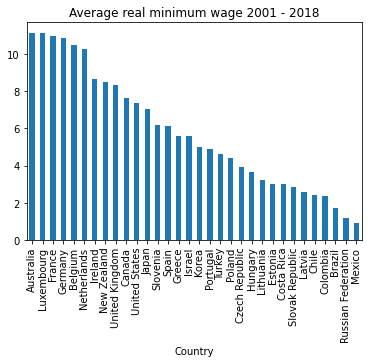

In [ ]:
gorsel_veri=yeni_panel_veri.mean().sort_values(ascending=False)

gorsel_veri.plot(kind='bar', title="Average real minimum wage 2001 - 2018")

etiket_veri=gorsel_veri.index.get_level_values('Country').tolist()
plt.xticks(range(0, len(etiket_veri)),etiket_veri)
plt.xlabel('Country')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  """Entry point for launching an IPython kernel.


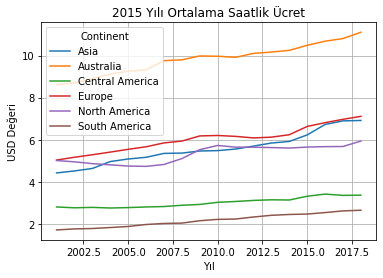

In [ ]:
gorsel_kita_verisi=yeni_panel_veri.mean(level='Continent', axis=1)

gorsel_kita_verisi.plot()
plt.title('2015 Yılı Ortalama Saatlik Ücret')
plt.ylabel('USD Değeri')
plt.xlabel('Yıl')
plt.grid(True)
plt.show()

# Veri İstatistik Analizleri

In [ ]:
yeni_panel_veri.stack().describe()

Continent,Asia,Australia,Central America,Europe,North America,South America
count,71.000000,36.000000,18.000000,328.000000,54.000000,54.000000
mean,5.551690,9.828333,3.019444,6.034604,5.322593,2.174630
std,1.258207,1.557835,0.232871,3.241908,3.188763,0.449388
min,2.900000,6.780000,2.760000,0.250000,0.900000,1.130000
25%,4.715000,8.810000,2.810000,3.300000,0.925000,2.010000
50%,5.400000,10.265000,2.980000,5.195000,6.865000,2.190000
75%,6.490000,11.117500,3.147500,9.222500,7.780000,2.452500
max,8.080000,12.140000,3.420000,11.880000,9.520000,3.120000
